## Linear regression

In [81]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error

#### Declare some visual functions

In [82]:
def plot_actual_vs_predicted(X_validation, y_actual, y_pred, feature, xlabel, ylabel):
    """
    Draw a scatter plot comparing actual and predicted values for a specific feature.

    Parameters:
    X_validation (pd.DataFrame): Input data containing the feature to be plotted.
    y_actual (array-like): Actual value.
    y_pred (array-like): Predicted value.
    feature (str): Column name in X_validation to compare.
    xlabel (str): Label for the X-axis (name of the feature displayed on the chart).
    ylabel (str): Label for the Y-axis (e.g. Price, Area, ...).
    """
    plt.figure(figsize=(12, 6))
    plt.scatter(X_validation[feature], y_actual, c='r', marker='o', label="Actual values", alpha=0.5) 
    plt.scatter(X_validation[feature], y_pred, c='b', marker='s', label="Predicted values", alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(f"Scatter Plot of Actual vs Predicted {ylabel} per {xlabel}")
    plt.show()


#### Select feature

##### Read data

- Practice training

In [83]:
df = pd.read_csv("TransformedData.csv")
df.head()

,Longitude,Latitude,Area (m²),Width (m),Length (m),Land Type,Legal Status,House Direction,Price,Ward Name_Phường An Hải Bắc,...,Street Name_đường 7m5 - Khu E Kim Long,Street Name_đường golden Hills,Street Name_đường khue đông,Street Name_đường số 5,1 Part Residential,All Residential,Back Expansion,Car Alley,Frontage,No Residential
0,10.400457,4.008204,10.000000,2.000000,0.736588,4,6,5.0,150000000,0.0,...,0.0,0.0,0.0,0.0,0,0,1,0,0,1
1,10.399917,4.006730,10.099505,2.236068,0.407946,4,6,8.0,165000000,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
2,10.399553,4.007356,12.247449,3.162278,-0.906622,4,6,6.0,250000000,0.0,...,0.0,0.0,0.0,0.0,1,0,1,0,0,1
3,10.400602,4.003590,10.000000,2.236068,-0.085017,4,5,6.0,250000000,0.0,...,0.0,0.0,0.0,0.0,1,0,1,0,0,1
4,10.398891,4.009621,10.000000,2.236068,-0.085017,4,5,4.0,250000000,0.0,...,0.0,0.0,0.0,0.0,0,0,1,0,0,1


##### Input variables

- Practice training

In [84]:
x = df.drop(columns=["Price", "Legal Status"])
x.head()

,Longitude,Latitude,Area (m²),Width (m),Length (m),Land Type,House Direction,Ward Name_Phường An Hải Bắc,Ward Name_Phường An Hải Tây,Ward Name_Phường An Hải Đông,...,Street Name_đường 7m5 - Khu E Kim Long,Street Name_đường golden Hills,Street Name_đường khue đông,Street Name_đường số 5,1 Part Residential,All Residential,Back Expansion,Car Alley,Frontage,No Residential
0,10.400457,4.008204,10.000000,2.000000,0.736588,4,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,1,0,0,1
1,10.399917,4.006730,10.099505,2.236068,0.407946,4,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
2,10.399553,4.007356,12.247449,3.162278,-0.906622,4,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,1,0,0,1
3,10.400602,4.003590,10.000000,2.236068,-0.085017,4,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,1,0,0,1
4,10.398891,4.009621,10.000000,2.236068,-0.085017,4,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,1,0,0,1


##### Target variables

- Practice training

In [85]:
y = df[['Price']]
y.head()

,Price
0,150000000
1,165000000
2,250000000
3,250000000
4,250000000


##### Divide into 2 training sets and validation sets

 - Split data

In [86]:
X_train, X_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=43)
print(X_train.shape, X_validation.shape)
print(y_train.shape, y_validation.shape)

(2578, 1468) (645, 1468)
(2578, 1) (645, 1)


#### Model training

##### Create a linear regression model object from the linear_model library and train it with input and target variables

In [87]:
regr = linear_model.LinearRegression(fit_intercept=True) 
regr.fit(X_train, y_train)

LinearRegression()

##### Correlation Coefficient and Intercept Deviation Value

In [88]:
print( 'Coefficient : ', regr.coef_ )
print( 'Interception  : ', regr.intercept_ )

Coefficient :  [[ 1.50934564e+11 -1.06631738e+11  1.10948627e+09 ... -2.58910536e+09
   4.33044127e+08  1.03601652e+08]]
Interception  :  [-1.14933957e+12]


##### Real estate price prediction

- On the train set

In [89]:
y_pred_train = regr.predict(X_train)
y_pred_train

array([[5.26487466e+09],
       [3.95000000e+09],
       [1.97910669e+09],
       ...,
       [3.80795714e+09],
       [4.32506513e+09],
       [3.18000000e+09]])

- Prediction on validation set

In [90]:
y_pred_validation = regr.predict(X_validation)
y_pred_validation

array([[ 1.43459998e+10],
       [ 8.59823950e+09],
       [ 6.34796160e+09],
       [ 4.38710382e+09],
       [ 6.63985761e+09],
       [ 4.85949679e+09],
       [ 4.17146493e+09],
       [ 3.01093980e+09],
       [ 1.66306783e+10],
       [ 3.50000000e+09],
       [ 4.99210513e+09],
       [ 1.64457664e+09],
       [ 5.84630445e+09],
       [ 4.27403721e+09],
       [ 4.31586713e+09],
       [ 2.81344163e+09],
       [ 7.00016216e+09],
       [ 8.33519053e+08],
       [ 6.07774563e+09],
       [ 4.02814247e+09],
       [ 3.31181951e+09],
       [ 9.07894999e+09],
       [ 4.90436660e+09],
       [ 4.41084644e+09],
       [ 6.05729930e+08],
       [ 3.30604507e+09],
       [ 1.87335705e+09],
       [ 2.40000000e+09],
       [ 7.07091043e+09],
       [ 2.24348502e+09],
       [ 4.35000000e+09],
       [ 6.63384154e+09],
       [ 1.64489732e+10],
       [-3.00387781e+08],
       [ 8.36081338e+09],
       [ 4.33663690e+09],
       [ 1.87553912e+10],
       [ 2.84292825e+09],
       [ 2.6

#### Model Evaluation

##### Calculation of mean square error MSE

- Train set

In [91]:
mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 1.1428078896783021e+18


- Validation set

In [92]:
mse = mean_squared_error(y_validation, y_pred_validation)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 4.5219156317452447e+18


##### R-squared tells us how much of the target variable the input variables can explain. The larger the R-squared, the better the model. When R-squared is 95%, it means that the input variables have explained 95% of the variation in the target variable.

- Train set

In [93]:
R_squared = r2_score(y_train, y_pred_train)
print("R² Score:", R_squared)

R² Score: 0.9257339513406239


- Validation set

In [94]:
R_squared = r2_score(y_validation, y_pred_validation)
print("R² Score:", R_squared)

R² Score: 0.7006038731674684


##### 4.3 MAPE is an index that measures the percentage error between the forecast value and the actual value (mean absolute percentage error) <br> When a model has MAPE = 5%, we say that the model has an average error of 5% compared to the average value

- Train set

In [95]:
mape = mean_absolute_percentage_error(y_train, y_pred_train)
print("MAPE:", mape)

MAPE: 0.5385026568845349


- Validation set

In [96]:
mape = mean_absolute_percentage_error(y_validation, y_pred_validation)
print("MAPE:", mape)

MAPE: 0.5216694396901542


##### Visualization of the *Price* characteristic difference between the initial value and the predicted value

- Training set

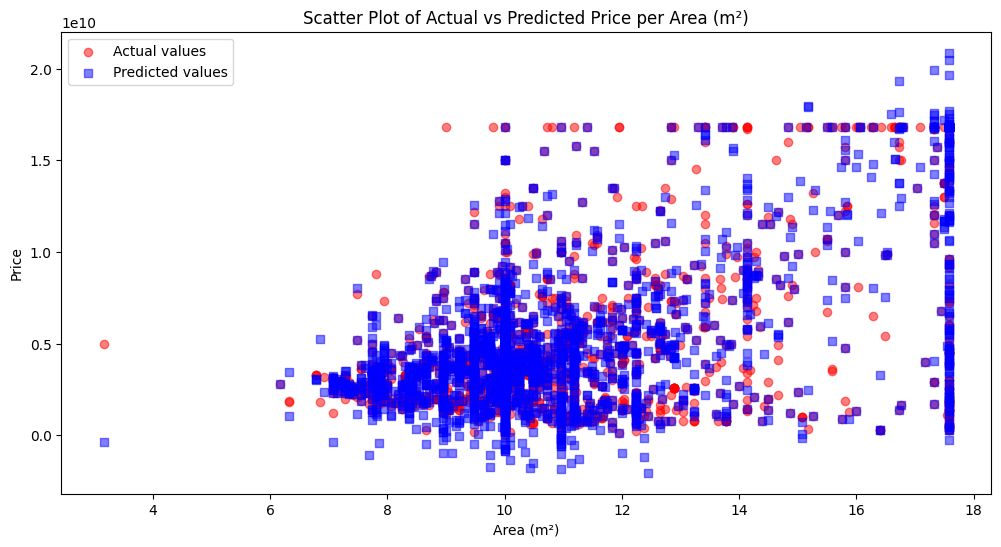

In [97]:
plot_actual_vs_predicted(X_train, y_train, y_pred_train, "Area (m²)", "Area (m²)", "Price")

- Validation set 

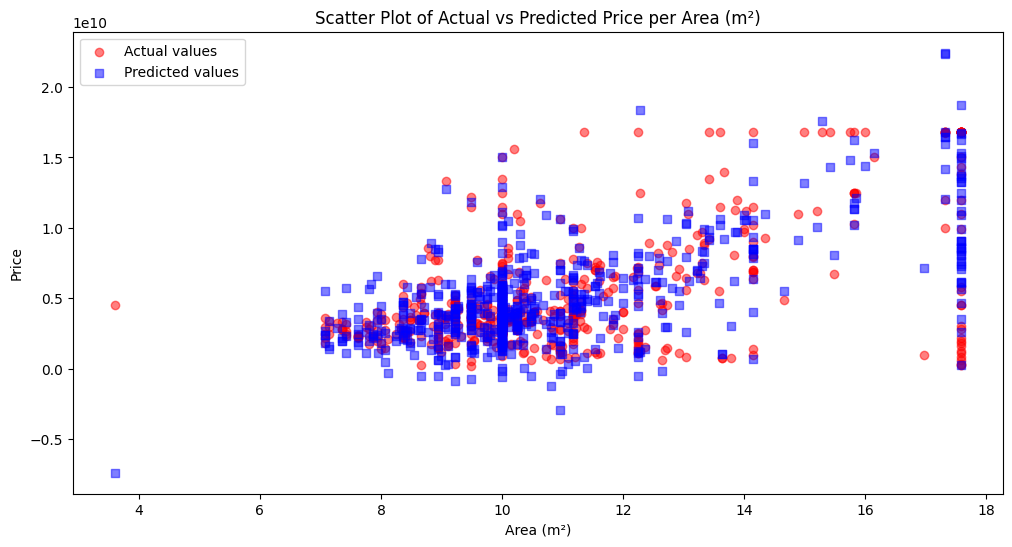

In [98]:
plot_actual_vs_predicted(X_validation, y_validation, y_pred_validation, "Area (m²)", "Area (m²)", "Price")

#### Conclusion

- Linear Regression is a supervised learning algorithm, used to estimate the relationship between independent variables and dependent variables. It is a statistical method used to find the best linear function to represent this relationship.
- Based on the assumption that the correlation between variables is linear, this algorithm predicts the value of the target variable from the values ​​of the input variables.
- This method is considered Simple Regression, prone to Overfitting with large data sets
- This method is also unstable, when the value of random_state changes, it can lead to fluctuations in the performance of the model.